In [1]:
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fname='/home/maria/Downloads/c.elegans.herm_pharynx_1.graphml'
graph=nx.read_graphml(fname)

In [3]:
def parse_graph(graph):
    adj_lst={}
    for line in nx.generate_adjlist(graph):
        strp_n=line.replace("n", "")
        lst=strp_n.split(' ')
        int_lst=[]
        for ind in lst:
            int_lst.append(int(ind))
        adj_lst[int_lst[0]]=int_lst[1:]
    return adj_lst

In [4]:
adj_lst=parse_graph(graph)

In [5]:
def adj_lst_to_mat_undirected(adj_lst):
    n_nodes=len(adj_lst.keys())
    con_mat=np.zeros((n_nodes,n_nodes))
    for node in adj_lst.keys():
        for adj in adj_lst[node]:
            con_mat[node,adj]=1
            con_mat[adj,node]=1
    return con_mat

In [6]:
con_mat=adj_lst_to_mat_undirected(adj_lst)

In [9]:
print(con_mat[0,10],con_mat[10,0])

1.0 1.0


In [10]:
laplacian=np.zeros(con_mat.shape)
for j in range(0,laplacian.shape[0]):
    laplacian[j,j]=con_mat[j,:].sum()
laplacian=laplacian-con_mat

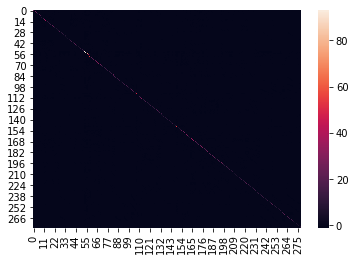

In [11]:
sns.heatmap(laplacian)

In [15]:
eig_vals,eig_vecs=np.linalg.eig(laplacian)

In [17]:
eig_vecs.shape

(279, 279)

In [22]:
print(eig_vals)

[ 9.41540632e+01  9.31103595e+01  7.62441942e+01  7.51101243e+01
  5.77637640e+01  5.73042617e+01  5.59461220e+01  5.50889594e+01
  5.34805138e+01  5.04107664e+01  4.51248482e+01  4.09823998e+01
  3.94761209e+01  3.76503763e+01  3.61777833e+01  3.60463906e+01
  3.52539351e+01  3.47106402e+01  3.44999144e+01  3.40067757e+01
 -1.00245897e-14  3.31080094e+01  3.28743619e+01  3.22555324e+01
  3.14380481e+01  3.08836080e+01  3.07215067e+01  2.99676857e+01
  2.97651668e+01  2.93217528e+01  2.86842555e+01  2.82679451e+01
  2.81069605e+01  2.73109273e+01  2.72322762e+01  2.66202893e+01
  2.68154313e+01  1.62727553e+00  1.75629865e+00  1.79522344e+00
  1.94628266e+00  2.19985822e+00  2.62984065e+01  2.61392762e+01
  2.59705476e+01  2.58879453e+01  2.57571410e+01  2.54904667e+01
  2.53843678e+01  2.49998898e+01  2.48078980e+01  2.46215023e+01
  2.43327081e+01  2.42237305e+01  2.41096529e+01  2.36435310e+01
  2.34356629e+01  2.33041994e+01  2.29859020e+01  2.30834810e+01
  2.26909435e+01  2.25621

In [33]:
from sklearn.cluster import SpectralClustering
import numpy as np
clustering = SpectralClustering(n_clusters=4,assign_labels="discretize",random_state=0,affinity='precomputed').fit(con_mat)
clustering.labels_

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2, 3, 2,
       2, 2, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 3, 3, 1, 1, 1,
       3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
resorted_data=np.zeros((1,279))
for j in range(0,4):
    resorted_data=np.vstack((resorted_data,con_mat[clustering.labels_==j]))
resorted_data=resorted_data[1:,:]
print(resorted_data.shape)

(279, 279)


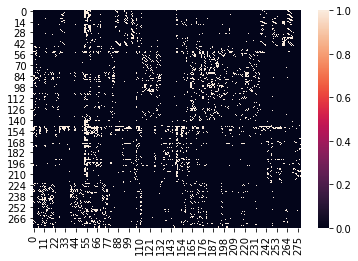

In [46]:
sns.heatmap(np.array(resorted_data))